In [9]:
import os
import sys

try:
    sys.path.index(os.getcwd()) # os.getcwd() for this directory
except ValueError:
    sys.path.append(os.getcwd())

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils import analysis_utils

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_val_predict, 
    GridSearchCV
)
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    precision_score, 
    recall_score,
    precision_recall_curve,
    f1_score,
)
from sklearn.neural_network import MLPClassifier

In [12]:
file = "../tests/covid_analytics_clinical_data.csv"
COVID_data = pd.read_csv(file)



COVID_data.rename(columns={'Mean corpuscular hemoglobin concentration (MCHC)': 'MCHC', 'Mean corpuscular hemoglobin (MCH)': 'MCH', 'Red blood cell distribution width (RDW)':'RDW', 'Mean corpuscular volume (MCV)':'MCV', 'Proteina C reativa mg/dL':'CRP'}, inplace=True)

In [13]:
all_variables = ["Patient age quantile", 
                  "Hemoglobin", 
                  "Platelets", 
                  "Red blood Cells",
                  "MCHC",
                  "MCH",
                  "RDW",
                  "MCV",
                  "Lymphocytes",
                  "Leukocytes", # <-1
                  "Monocytes", #
                  "Basophils", # <-1
                  "Eosinophils", # <-1
                  "CRP", # <-1
                  "Hematocrit", # <-1
                  "Mean platelet volume ", ##
                  "Neutrophils" # <-1
                ]

all_variables = ["Patient age quantile", 
                  "Hemoglobin", 
                  "Platelets", 
                  #"Red blood Cells",
                  #"MCHC",
                  #"MCH",
                  #"RDW",
                  #"MCV",
                  #"Lymphocytes",
                  "Leukocytes", # <-1
                  "Monocytes", #
                  "Basophils", # <-1
                  "Eosinophils", # <-1
                  "CRP", # <-1
                  "Hematocrit", # <-1
                  #"Mean platelet volume ", ##
                  "Neutrophils" # <-1
                ]


test_results = ["result"]

Create dataset for all variables

In [14]:
COVID_data = COVID_data.dropna(subset=["Monocytes"])

COVID_data["result"] = COVID_data["SARS-Cov-2 exam result"].map({'positive': 1, 'negative': 0})
COVID_all_variables = COVID_data[all_variables+test_results].copy()
COVID_all_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 1 to 5643
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient age quantile  601 non-null    int64  
 1   Hemoglobin            601 non-null    float64
 2   Platelets             601 non-null    float64
 3   Leukocytes            601 non-null    float64
 4   Monocytes             601 non-null    float64
 5   Basophils             601 non-null    float64
 6   Eosinophils           601 non-null    float64
 7   CRP                   501 non-null    float64
 8   Hematocrit            601 non-null    float64
 9   Neutrophils           513 non-null    float64
 10  result                601 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 56.3 KB


Create dataset for my variables

Correlation matrix for all vaiables

In [67]:
# corr_matrix_all_variables = COVID_all_variables.corr()
# fig, ax = plt.subplots(figsize=(30,25))
# sns.set(font_scale=1.5)
# sns.heatmap(corr_matrix_all_variables, annot=True, fmt='.2f' , cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
# ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
# plt.savefig('corr_matrix_all_variables.pdf', bbox_inches='tight', pad_inches=0.0)

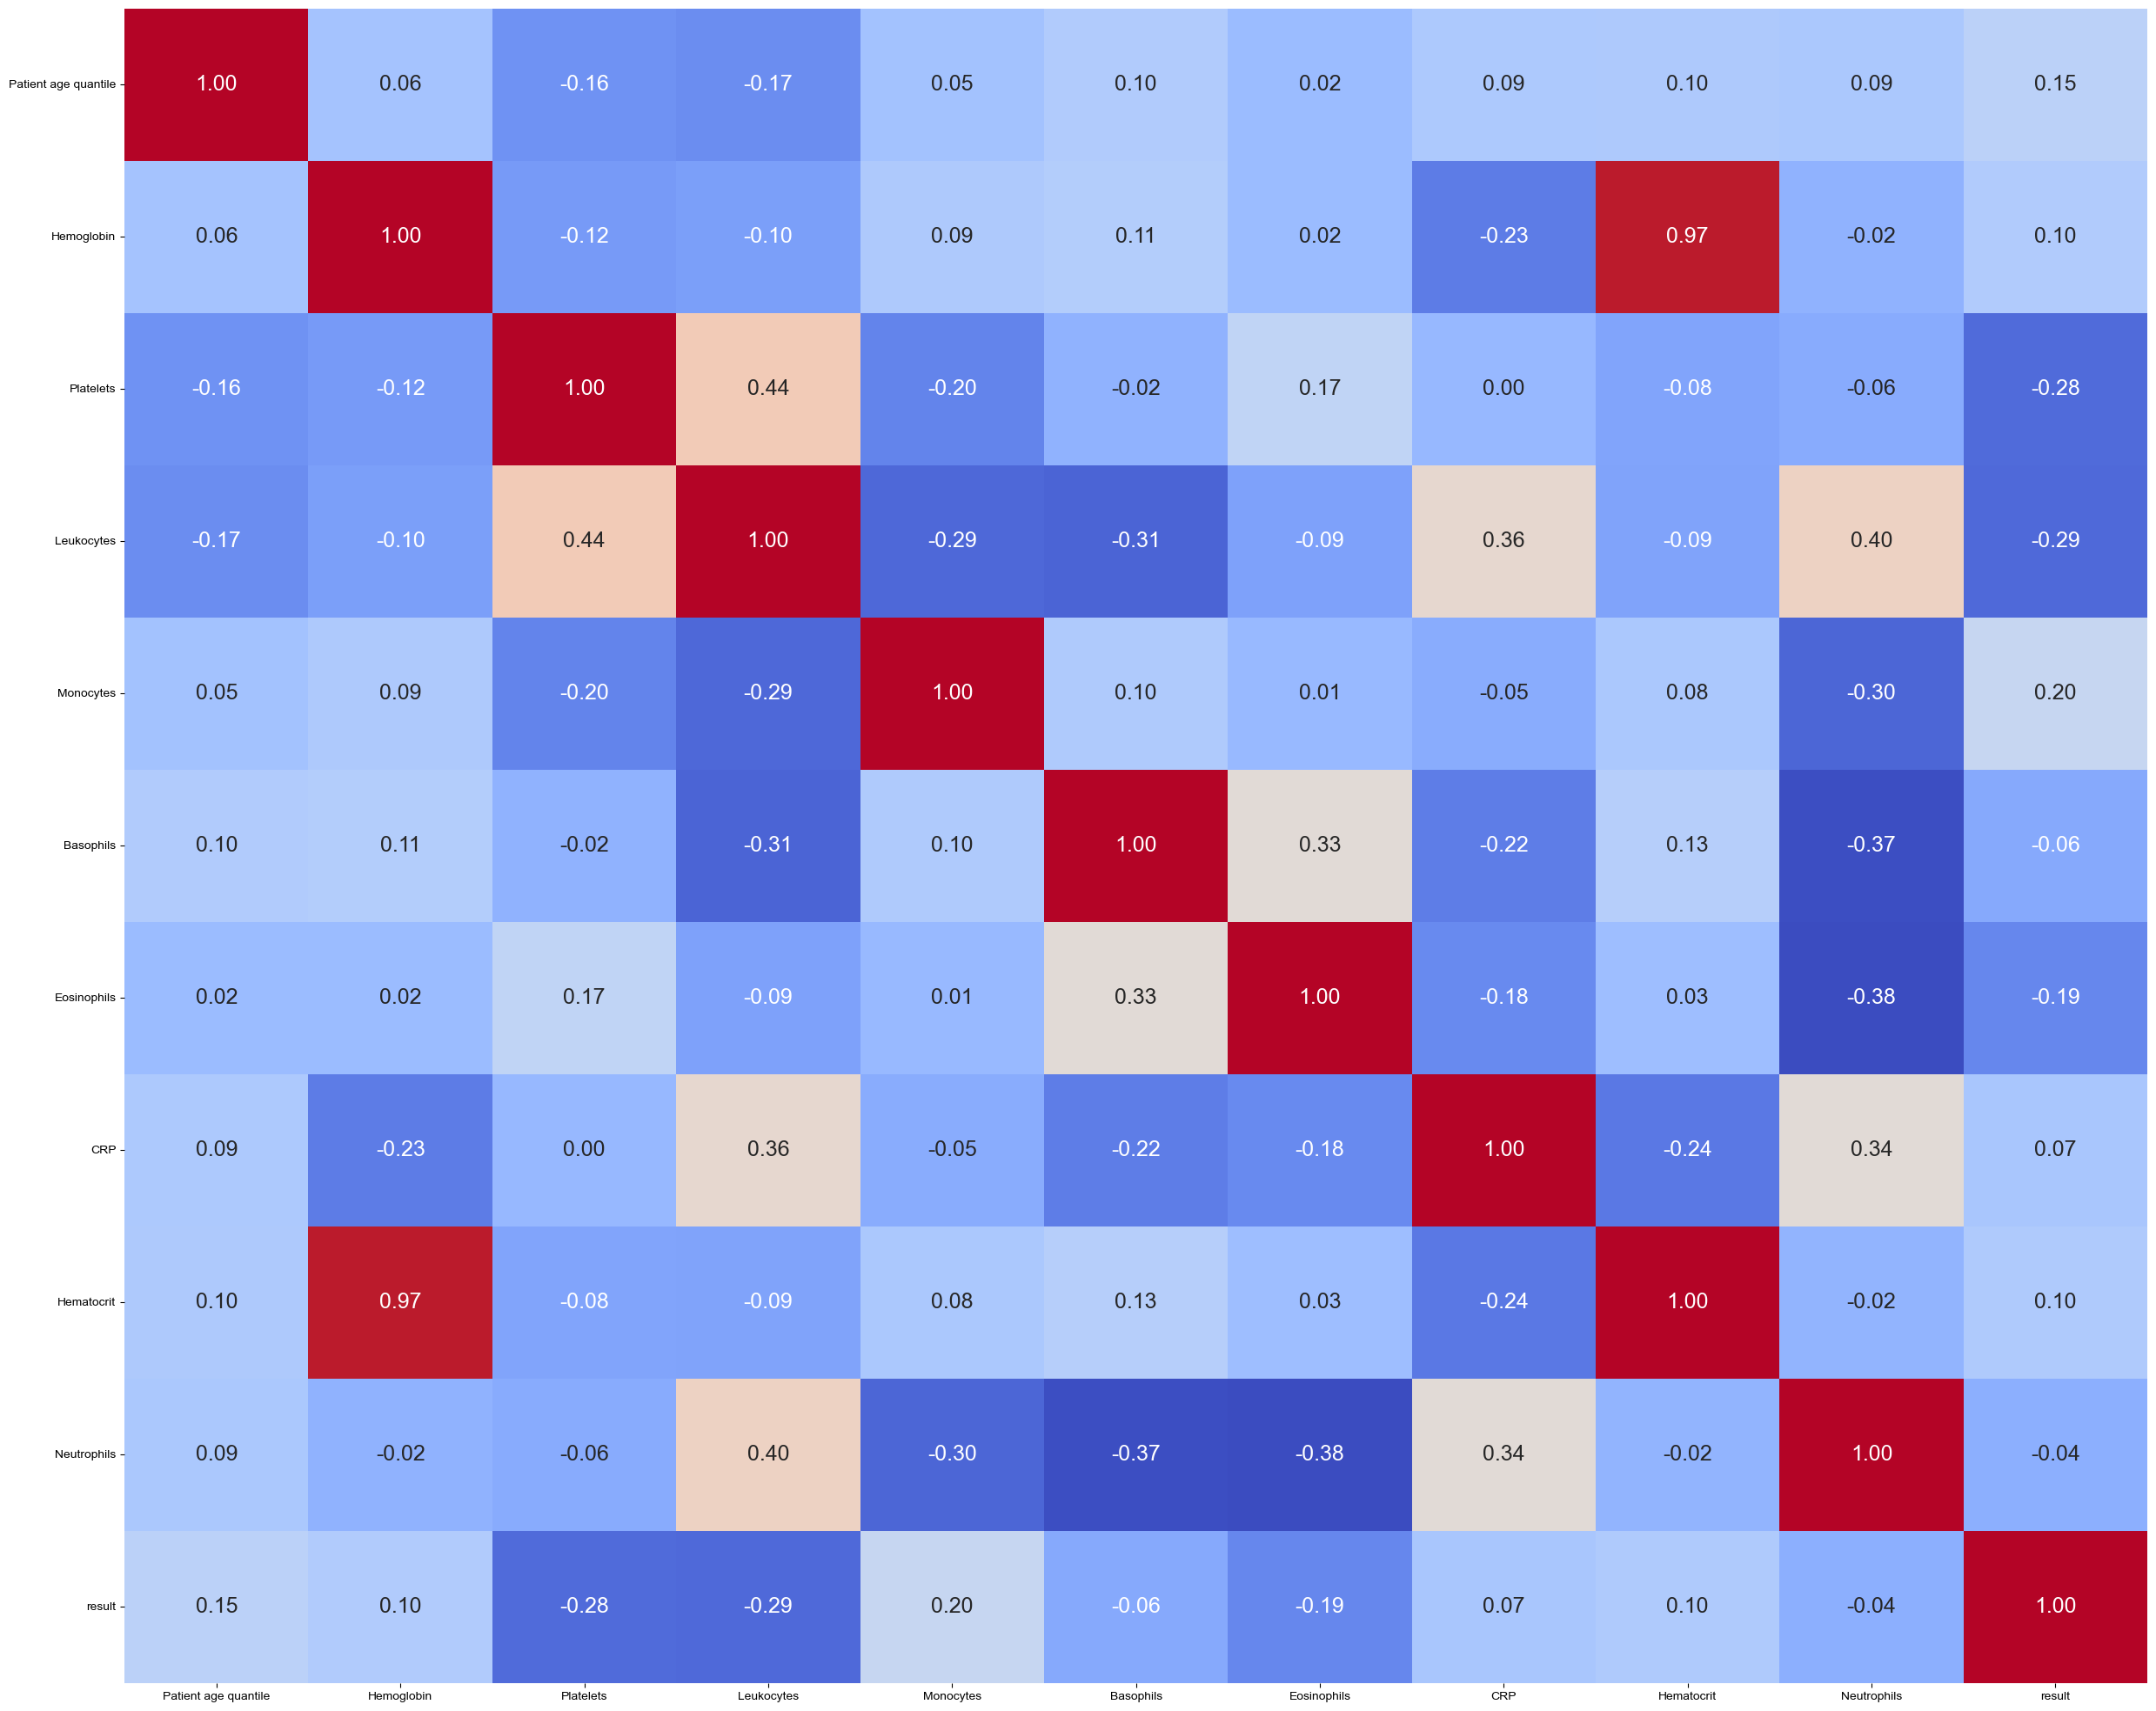

In [15]:
l = COVID_all_variables[all_variables+test_results]
corr_matrix_pos = l.corr()
fig, ax = plt.subplots(figsize=(30,25))
sns.set(font_scale=1.5)
sns.heatmap(corr_matrix_pos, annot=True, fmt='.2f' , cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('corr_matrix.pdf', bbox_inches='tight', pad_inches=0.0)

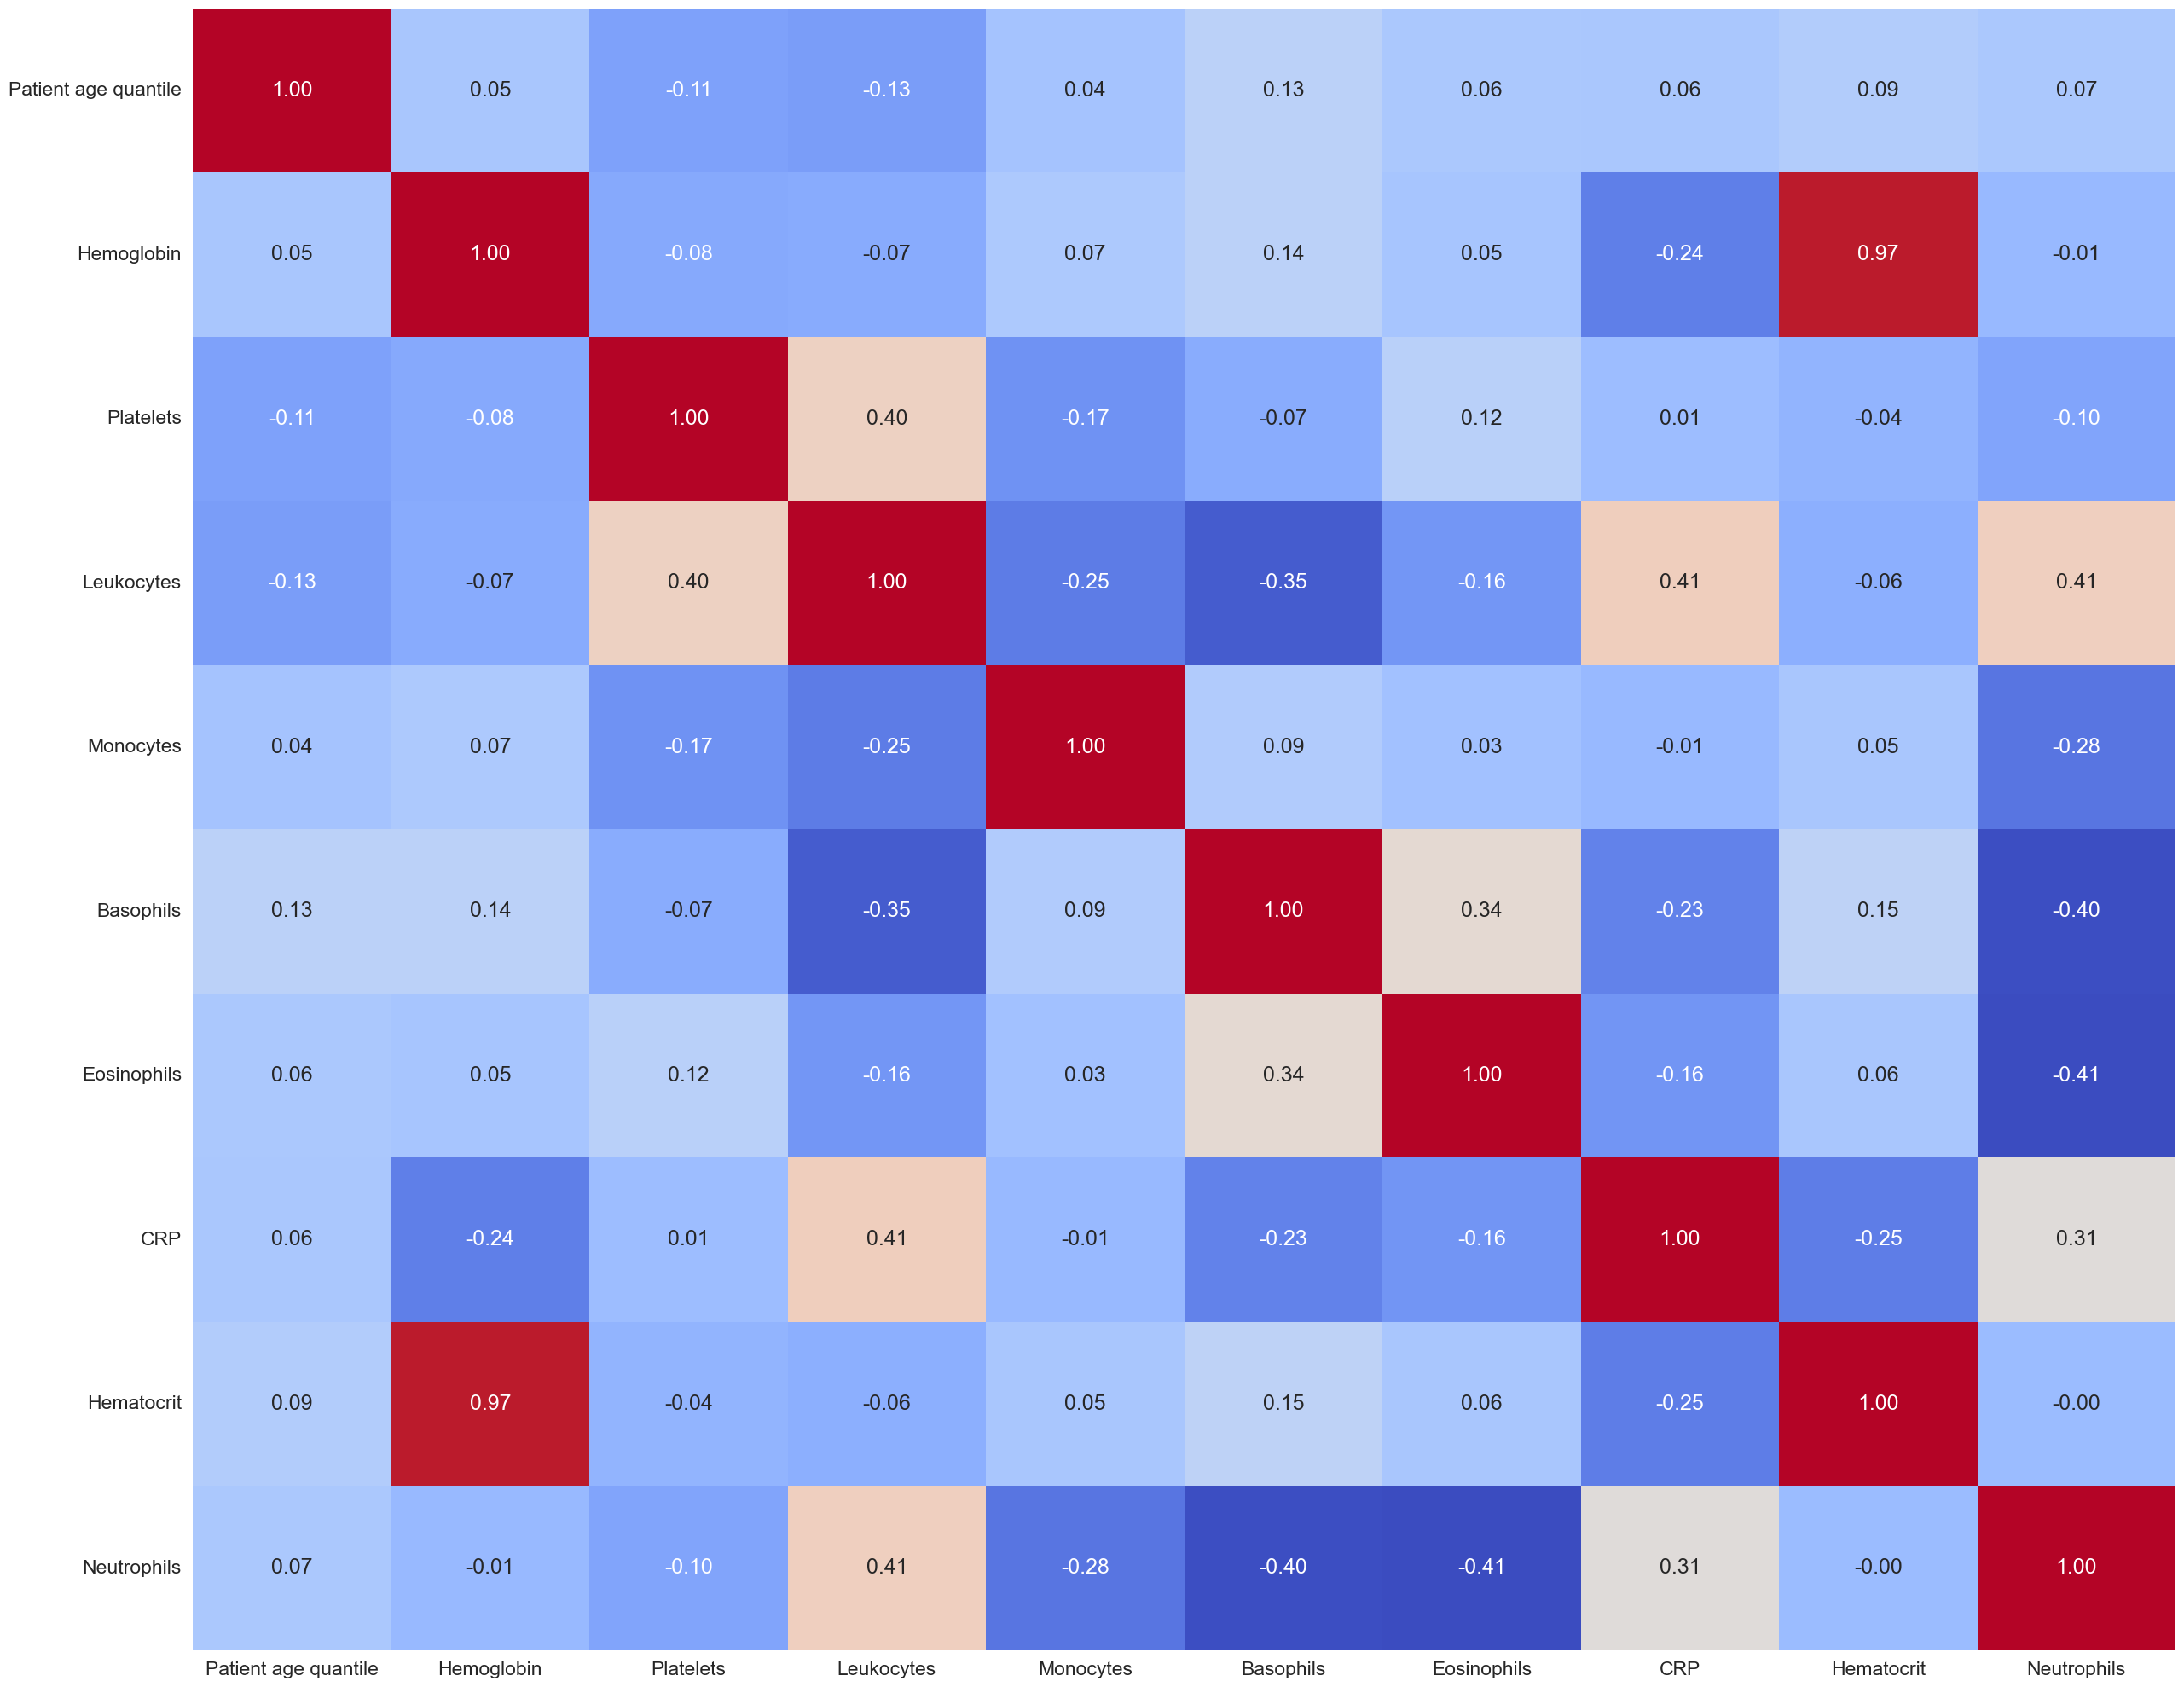

In [16]:
l = COVID_all_variables[all_variables]
corr_matrix_neg = l[COVID_all_variables['result']==0].corr()
fig, ax = plt.subplots(figsize=(30,25))
sns.set(font_scale=1.5)
sns.heatmap(corr_matrix_neg, annot=True, fmt='.2f' , cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('corr_matrix_neg.pdf', bbox_inches='tight', pad_inches=0.0)

In [70]:
# sns.set(font_scale=1.)
# axes = COVID_all_variables[COVID_all_variables['result']==0].hist(alpha=0.5, label='Negative', figsize=(20,15), bins = 20, range=[-4, 4])
# COVID_all_variables[COVID_all_variables['result']==1].hist(ax=axes.ravel()[:18], alpha=0.5, label='Positive', figsize=(20,15), bins = 20, range=[-4, 4])
# plt.show()

Plot all variables

In [18]:
os.mkdir('Figs')

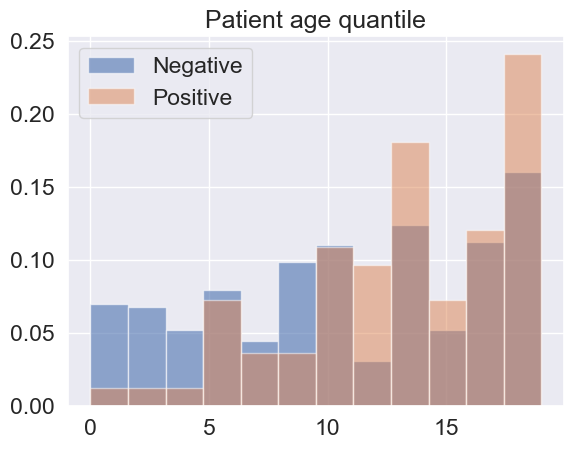

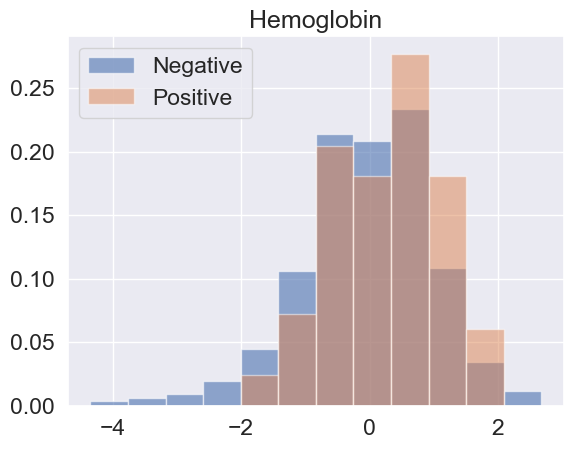

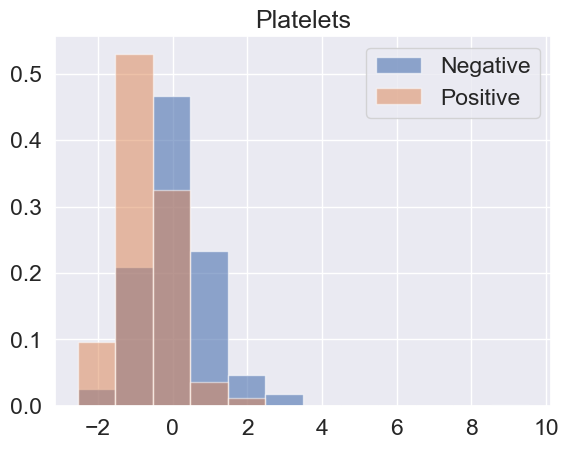

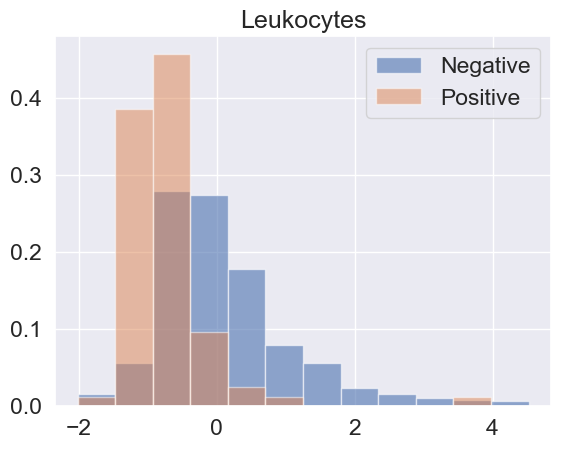

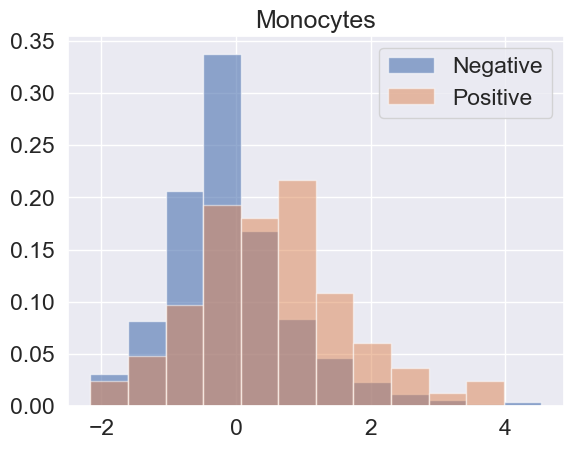

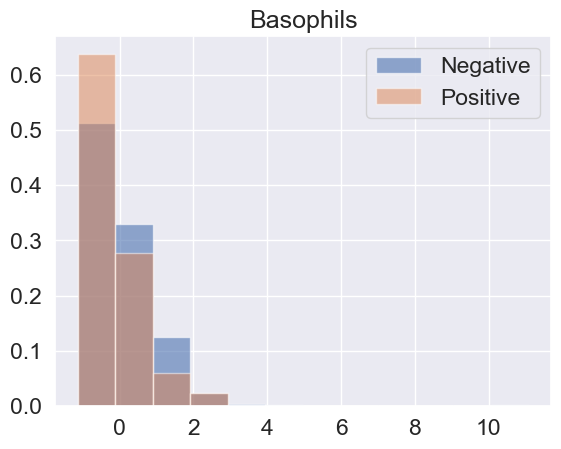

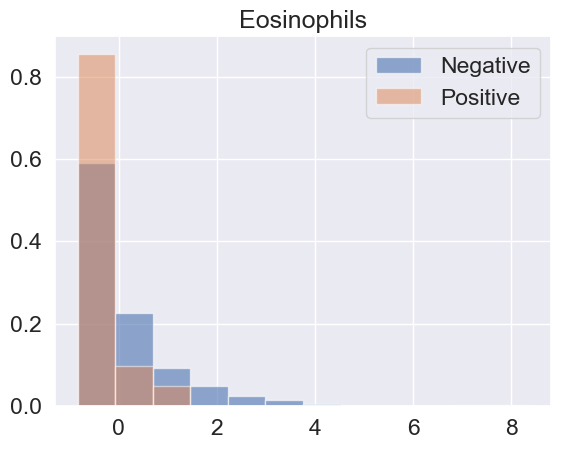

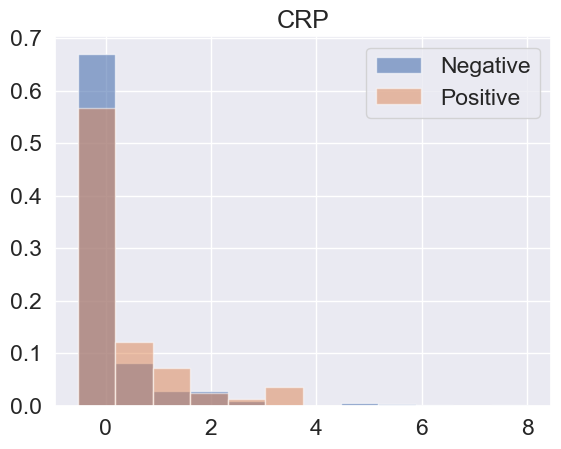

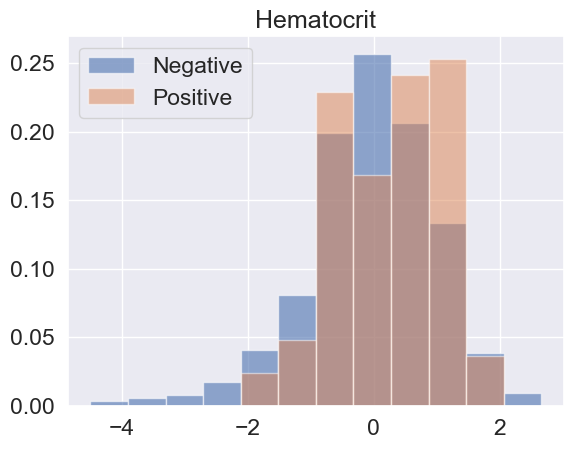

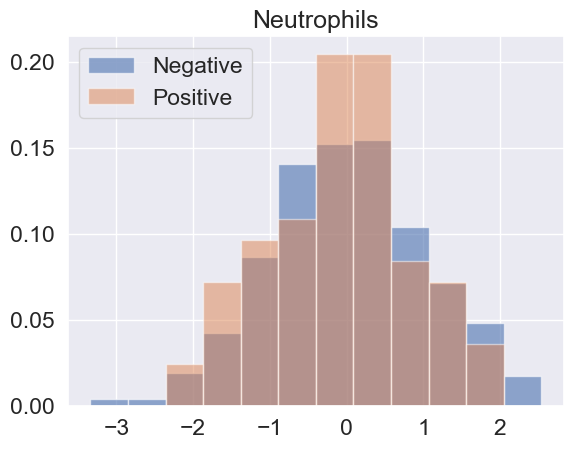

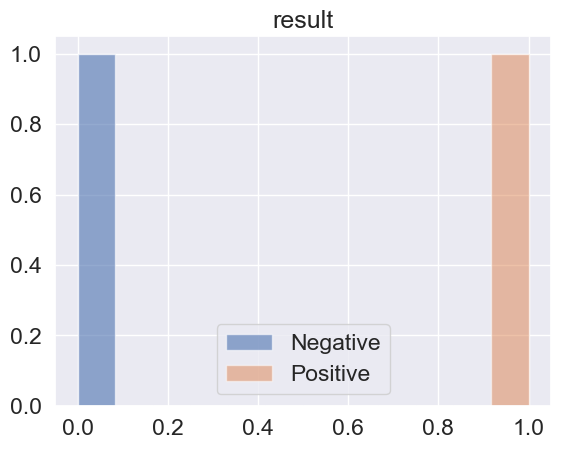

In [19]:
#sns.set(style="ticks")
COVID_data_pos = COVID_all_variables[COVID_all_variables['result']==1]
COVID_data_neg = COVID_all_variables[COVID_all_variables['result']==0]
for variable in COVID_all_variables:
    maxi = max(COVID_all_variables[variable])
    mini = min(COVID_all_variables[variable])

    weights1 = np.ones_like(COVID_data_neg[variable])/len(COVID_data_neg[variable])
    weights2 = np.ones_like(COVID_data_pos[variable])/len(COVID_data_pos[variable])
    
    plt.title(variable)
    plt.hist(COVID_data_neg[variable], alpha=0.6, label='Negative', bins = 12, range=[mini, maxi], weights=weights1)
    plt.hist(COVID_data_pos[variable], alpha=0.5, label='Positive', bins = 12, range=[mini, maxi], weights=weights2)
    plt.legend()
    plt.savefig('Figs/{}.png'.format(variable.replace(' ', '_').replace('/','')))
    plt.show()

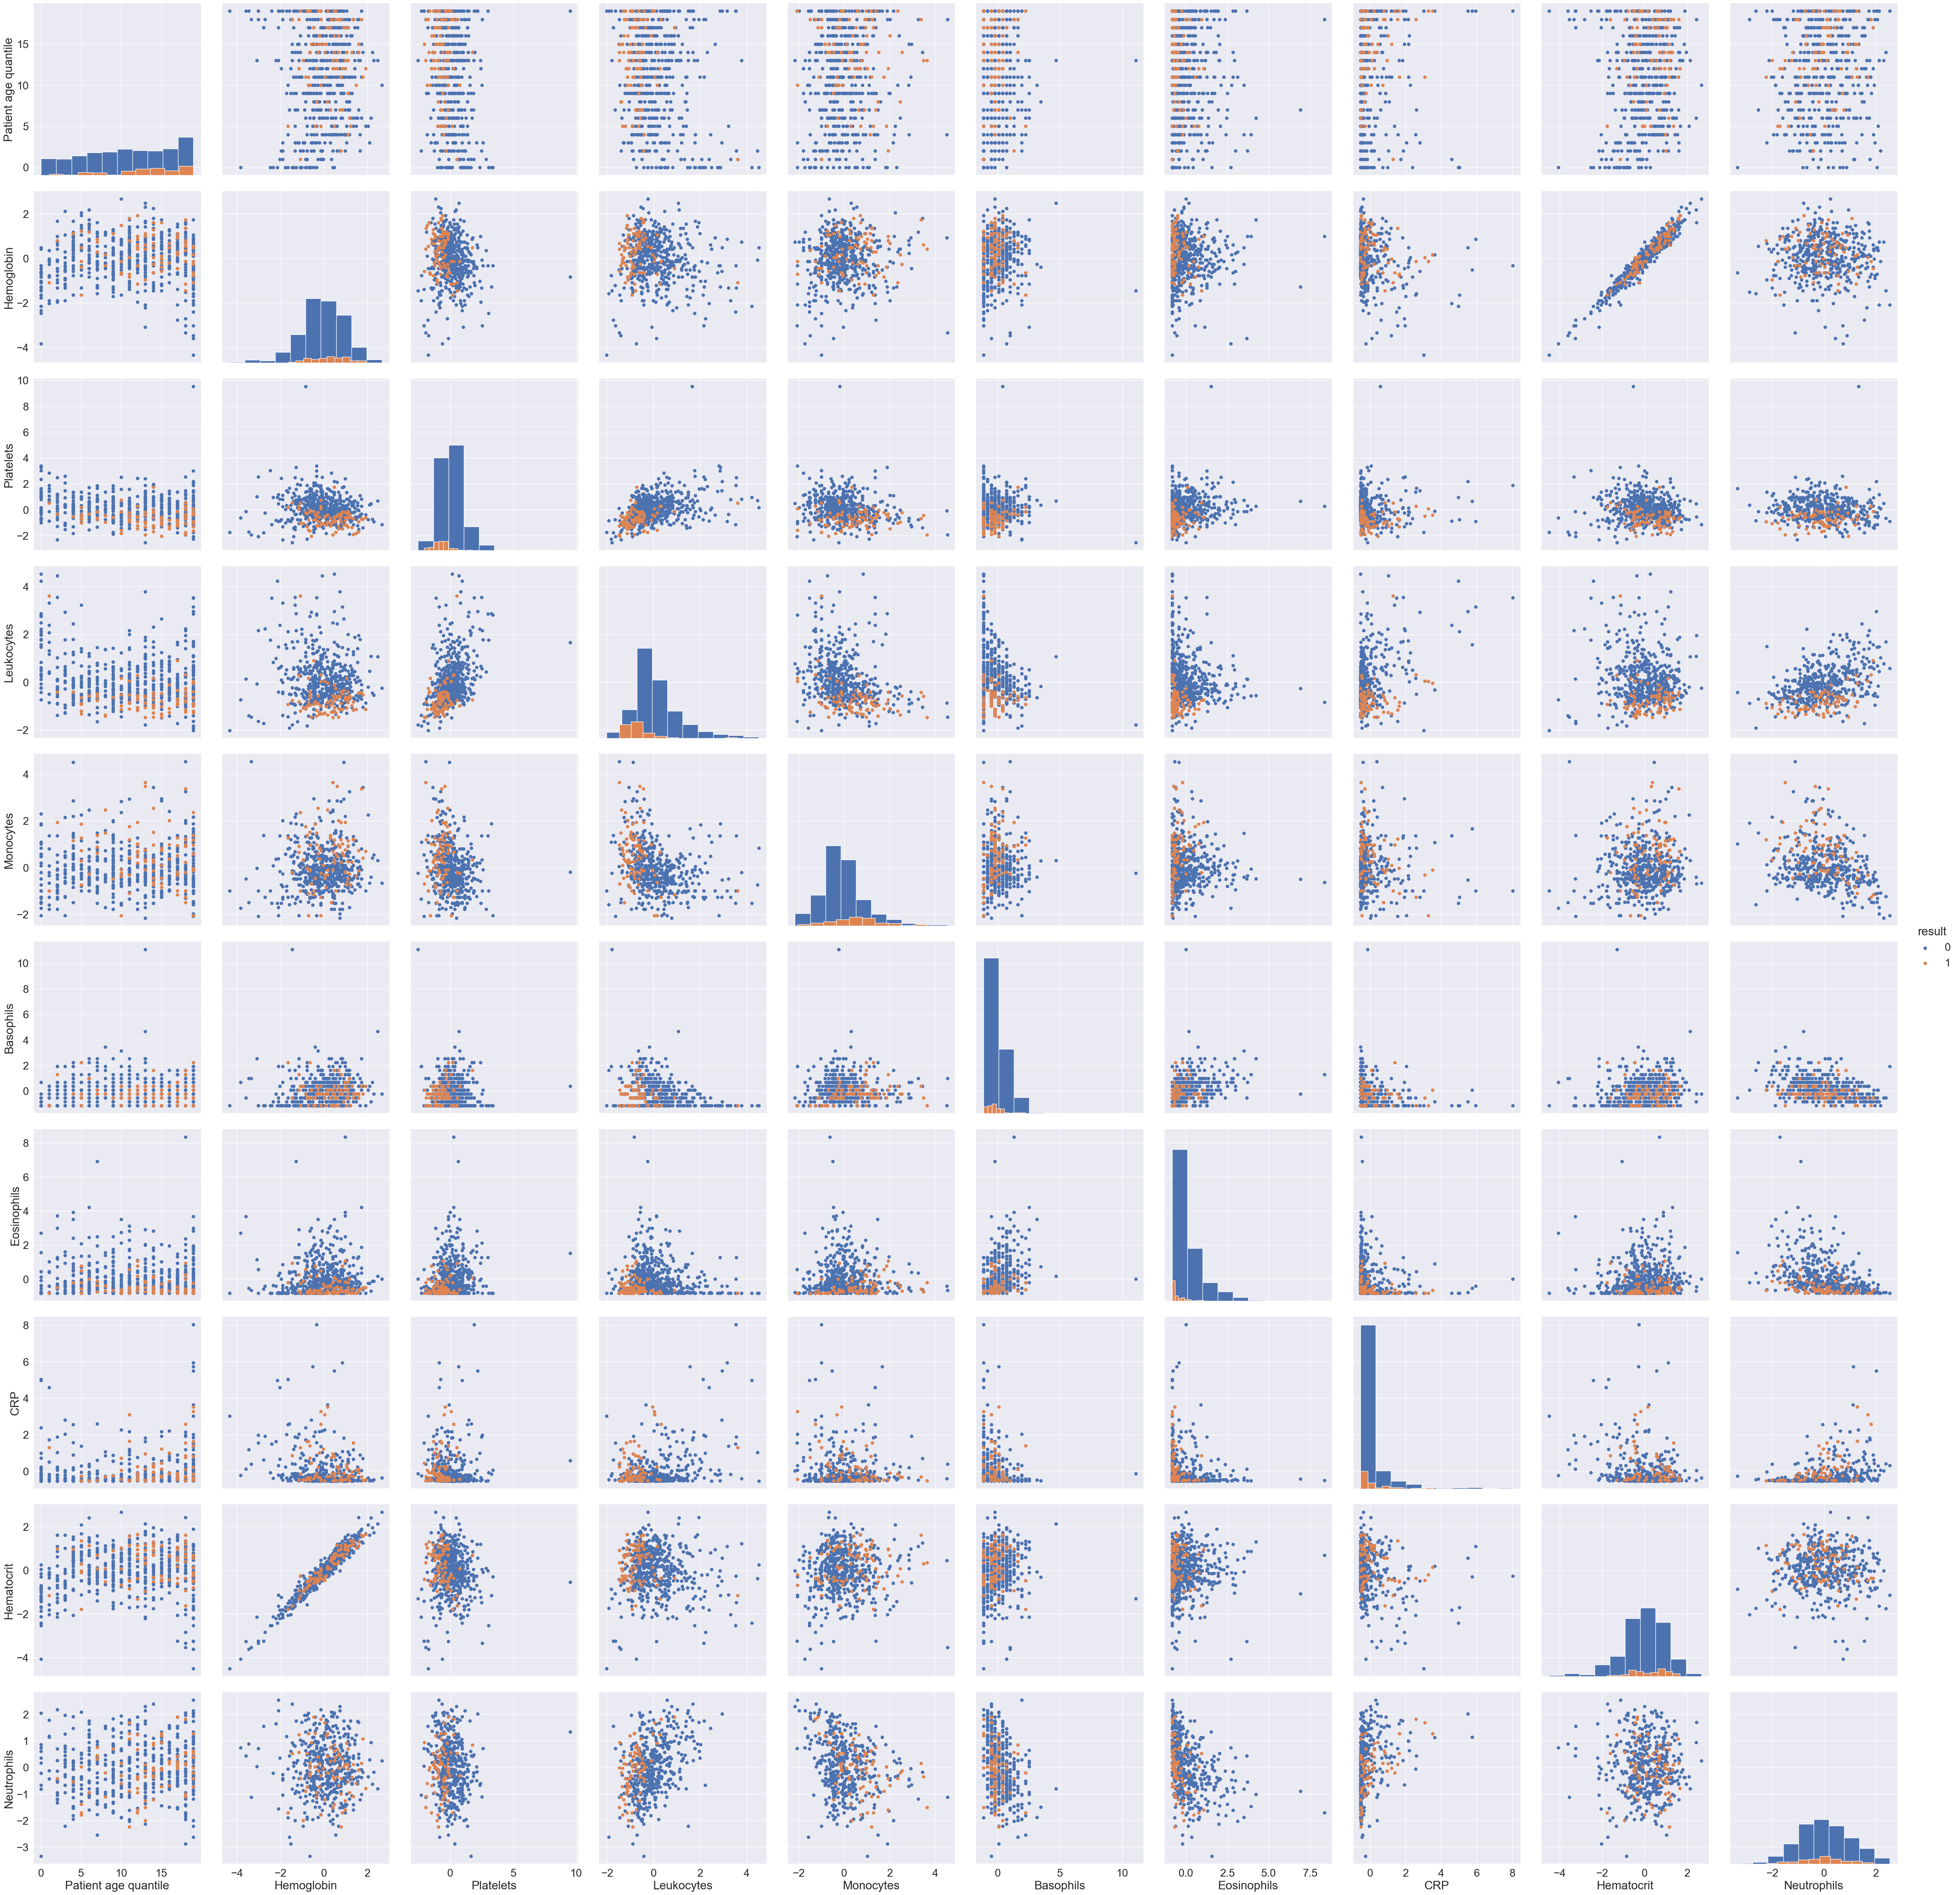

In [20]:
sns.set(font_scale=2)
g = sns.PairGrid(COVID_all_variables, hue="result", vars=COVID_all_variables[all_variables], height=5.5) 
g = g.map_offdiag(plt.scatter)
g.map_diag(plt.hist) 
g.add_legend() 
g.set(alpha=0.5)

plt.savefig("pairplot2.pdf")

Split dataset with all vaiables into train and test datasets 

In [21]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(COVID_all_variables[all_variables], COVID_all_variables[test_results], test_size=0.3, random_state=42)
print('{} training events, {} testing events'.format(len(y_train_all), len(y_test_all)))

n_train_pos_all = len([i[0] for i in y_train_all.values if i[0]==1])
n_test_pos_all = len([i[0] for i in y_test_all.values if i[0]==1])
n_train_neg_all = len([i[0] for i in y_train_all.values if i[0]==0])
n_test_neg_all = len([i[0] for i in y_test_all.values if i[0]==0])

print("Training: {} of which are positive and {} are negative".format(n_train_pos_all, n_train_neg_all))
print("Testing: {} of which are positive and {} are negative".format(n_test_pos_all, n_test_neg_all))

420 training events, 181 testing events
Training: 61 of which are positive and 359 are negative
Testing: 22 of which are positive and 159 are negative


Split dataset with my vaiables into train and test datasets 

In [22]:
def impute_with_median (df):
    """Iterate through columns of Pandas DataFrame.
    Where NaNs exist replace with median"""
    
    # Get list of DataFrame column names
    cols = list(df)
    # Loop through columns
    for column in cols:
        # Transfer column to independent series
        col_data = df[column]
        # Look to see if there is any missing numerical data
        missing_data = sum(col_data.isna())
        if missing_data > 0:
            # Get median and replace missing numerical data with median
            col_median = col_data.median()
            col_data.fillna(col_median, inplace=True)
            df[column] = col_data
    return df

In [23]:
X_train_all = impute_with_median(X_train_all)
X_train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 2546 to 619
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient age quantile  420 non-null    int64  
 1   Hemoglobin            420 non-null    float64
 2   Platelets             420 non-null    float64
 3   Leukocytes            420 non-null    float64
 4   Monocytes             420 non-null    float64
 5   Basophils             420 non-null    float64
 6   Eosinophils           420 non-null    float64
 7   CRP                   420 non-null    float64
 8   Hematocrit            420 non-null    float64
 9   Neutrophils           420 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 36.1 KB


In [24]:
X_test_all = impute_with_median(X_test_all)
X_test_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 693 to 681
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient age quantile  181 non-null    int64  
 1   Hemoglobin            181 non-null    float64
 2   Platelets             181 non-null    float64
 3   Leukocytes            181 non-null    float64
 4   Monocytes             181 non-null    float64
 5   Basophils             181 non-null    float64
 6   Eosinophils           181 non-null    float64
 7   CRP                   181 non-null    float64
 8   Hematocrit            181 non-null    float64
 9   Neutrophils           181 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 15.6 KB


In [25]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                       
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid(True)

In [26]:
# param_grid = [
#               {
#                 'activation' : ['logistic'], #['identity', 'logistic', 'tanh', 'relu'],
#                 'solver' : ['lbfgs', 'sgd', 'adam'],
#                 'alpha': [0.0001], #[0.05],
#                 'random_state':[42],
#                 'learning_rate': ['constant','adaptive'],
#                 'hidden_layer_sizes': [
#                 (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,),(12,),
#                 (1,1),(2,2),(3,3),(4,4),(5,5),(6,6),(7,7),(8,8),(9,9),(10,10),(11,11),(12,12),
#                 (2,1),(3,2),(3,1),(4,3),(4,2),(4,1),(7,6),(7,5),(7,4),(8,7),(8,6),(8,5),(9,8),
#                 (9,7),(10,9),(10,8)
#                 ]
#               }
#              ]

param_grid = [
              {
                'activation' : ['logistic'], #['identity', 'logistic', 'tanh', 'relu'],
                'solver' : ['lbfgs'],
                'alpha': [0.0001], #[0.05],
                'random_state':[i for i in range(100,3000)],
                'learning_rate': ['constant'],
                'hidden_layer_sizes': [(12,12)]
              }
             ]

In [27]:
# from sklearn.neural_network.multilayer_perceptron import MLPClassifier

# MLP_clf_best_all = GridSearchCV(MLPClassifier(), param_grid, cv=2, scoring='f1')
# MLP_clf_best_all.fit(X_train_all.values, y_train_all.values.ravel())

Best paameters for all variables

In [28]:
# print("Best parameters set found on development set:")
# print(MLP_clf_best_all.best_params_)
# print(MLP_clf_best_all.best_estimator_)

Best parameters for my variables

->Best accuracy:
(this was the best one)
MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
              
->Best f1:

 MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 12), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
# print("Best parameters set found on development set:")
# print(MLP_clf_best.best_params_)
# print(MLP_clf_best.best_estimator_)

/Users/Heloisa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Heloisa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/Heloisa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

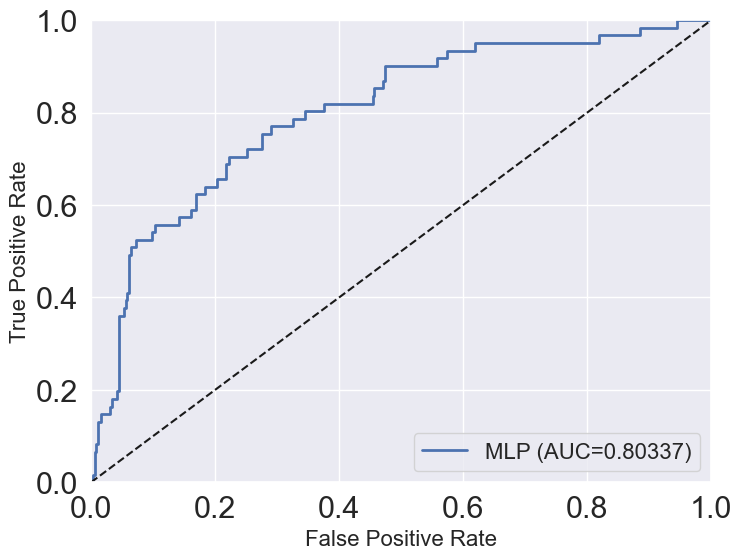

0.8033700168957486

In [30]:
MLP_clf_noseed = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 12), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


MLP_clf_noseed.fit(X_train_all, y_train_all)

y_probas_MLP_noseed = cross_val_predict(MLP_clf_noseed, X_train_all.values, y_train_all.values.ravel(), cv=2, method="predict_proba")
y_scores_MLP_noseed = y_probas_MLP_noseed[:, 1]
fpr_MLP_noseed, tpr_MLP_noseed, thresholds_MLP_noseed = roc_curve(y_train_all, y_scores_MLP_noseed)

AOC_all_variables_noseed = 0
times = 1
for seed in range(times):
    AOC_all_variables_noseed += roc_auc_score(y_train_all, y_scores_MLP_noseed)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_MLP_noseed, tpr_MLP_noseed, "MLP (AUC={0:.5f})".format(roc_auc_score(y_train_all, y_scores_MLP_noseed)))
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.savefig('ROC_curve.png')
plt.show()

AOC_all_variables = roc_auc_score(y_train_all, y_scores_MLP_noseed)
AOC_all_variables

In [31]:
var_list = []
y_scores_MLP_list = []
roc_values = []

for i_var, variable in enumerate(all_variables):
    this_vars = all_variables[:i_var]+all_variables[i_var+1:]
    var_list.append(this_vars)
    this_score = cross_val_predict(MLP_clf_noseed, X_train_all[this_vars].values, y_train_all.values.ravel(), cv=2, method="predict_proba")[:, 1]
    y_scores_MLP_list.append(this_score)
    roc_values.append(roc_curve(y_train_all, this_score))

/Users/Heloisa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/Heloisa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/Heloisa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (

                      AOC change
Eosinophils             0.760309
Hemoglobin              0.766382
Leukocytes              0.774465
Patient age quantile    0.788620
Neutrophils             0.802000
CRP                     0.820540
Hematocrit              0.822138
Monocytes               0.843007
Platelets               0.857482
Basophils               0.863464


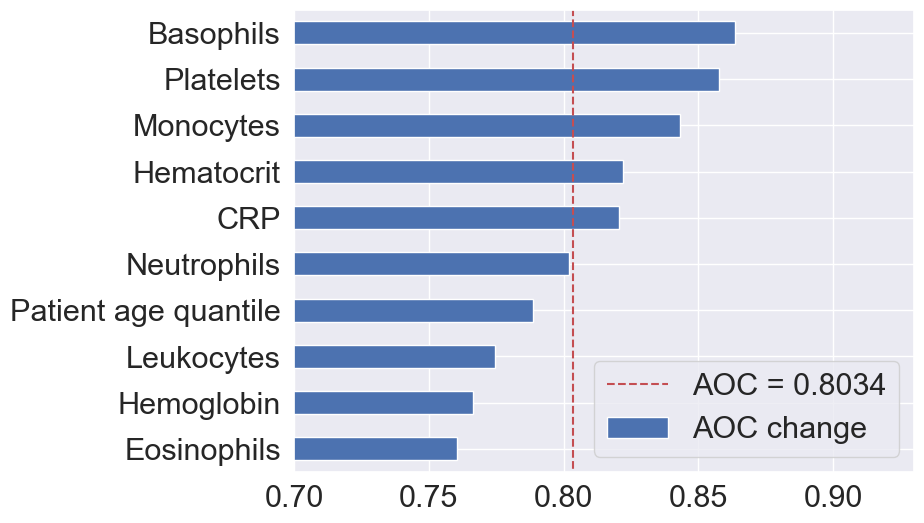

In [32]:
rank_features = {}
for i_var, variable in enumerate(all_variables):
    rank_features[variable] = 0

times = 1
for seed in range(times):
    for i_var, variable in enumerate(all_variables):
        rank_features[variable] = rank_features[variable]+(roc_auc_score(y_train_all, y_scores_MLP_list[i_var]))/times

rank_features = pd.DataFrame(data=rank_features.values(), index=rank_features.keys(), columns=['AOC change'])
rank_features = rank_features.sort_values(by='AOC change')

print(rank_features)

plt.figure(figsize=(8, 6))
rank_features['AOC change'].plot(kind = "barh")
plt.vlines(AOC_all_variables_noseed/times,-10,20, colors='r', linestyles='--', label='AOC = {0:.4f}'.format(AOC_all_variables_noseed/times))
plt.xlim(0.7,0.93)
plt.legend()
plt.savefig('features_noseed.png',  bbox_inches='tight')

In [33]:
# times = 10
# AOC_all_variables_noseed = 0

# rank_features = {}
# for i_var, variable in enumerate(all_variables):
#     rank_features[variable] = 0

# for i in range(times):
#     seed = i+40
#     MLP_clf_noseed = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(4, 4), learning_rate='constant', learning_rate_init=0.001, max_iter=200, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=None, shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False)


#     y_probas_MLP_noseed = cross_val_predict(MLP_clf_noseed, X_train_all.values, y_train_all.values.ravel(), cv=3, method="predict_proba")
#     y_scores_MLP_noseed = y_probas_MLP_noseed[:, 1]
#     fpr_MLP_noseed, tpr_MLP_noseed, thresholds_MLP_noseed = roc_curve(y_train_all, y_scores_MLP_noseed)

#     AOC_all_variables_noseed += roc_auc_score(y_train_all, y_scores_MLP_noseed)


#     var_list = []
#     y_scores_MLP_list = []
#     roc_values = []

#     for i_var, variable in enumerate(all_variables):
#         this_vars = all_variables[:i_var]+all_variables[i_var+1:]
#         var_list.append(this_vars)
#         this_score = cross_val_predict(MLP_clf_noseed, X_train_all[this_vars].values, y_train_all.values.ravel(), cv=3, method="predict_proba")[:, 1]
#         y_scores_MLP_list.append(this_score)
#         roc_values.append(roc_curve(y_train_all, this_score))

    
#     for i_var, variable in enumerate(all_variables):
#         rank_features[variable] = rank_features[variable]+(roc_auc_score(y_train_all, y_scores_MLP_list[i_var]))/times

        
        
# rank_features = pd.DataFrame(data=rank_features.values(), index=rank_features.keys(), columns=['AOC change'])
# rank_features = rank_features.sort_values(by='AOC change')

# print(rank_features)

# plt.figure(figsize=(8, 6))
# rank_features['AOC change'].plot(kind = "barh")
# plt.vlines(AOC_all_variables_noseed/times,-10,20, colors='r', linestyles='--', label='AOC = {0:.5f}'.format(AOC_all_variables_noseed/times))
# plt.xlim(0.6,0.92)
# plt.legend()

# plt.savefig('features_noseed.png',  bbox_inches='tight')

Confusion Matrix:
[[TN  FP]
 [FN  TP]] = 
[[315  44]
 [ 12  49]]

Precision: TP/(TP+FP) =  0.5268817204301075
Recall: TP/(TP+FN) =  0.8032786885245902
F1 score =  0.6363636363636364


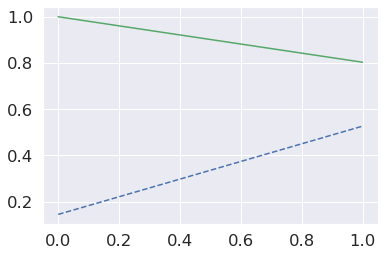

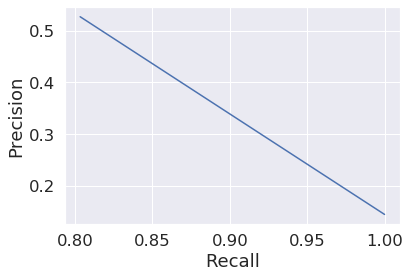

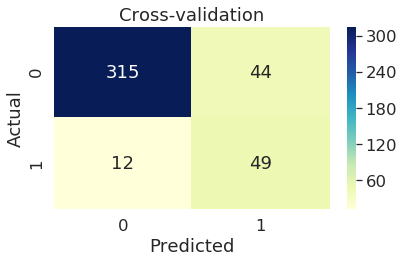

In [88]:
y_probas_MLP_noseed_b_prob = cross_val_predict(MLP_clf_noseed, X_train_all[all_variables].values, y_train_all.values.ravel(), cv=2, method="predict_proba")
threshold = 0.03
y_probas_MLP_noseed_b = (y_probas_MLP_noseed_b_prob [:,1] >= threshold).astype('int')

conf = confusion_matrix(y_train_all, y_probas_MLP_noseed_b)
print("Confusion Matrix:")
print("[[TN  FP]")
print(" [FN  TP]] = ")
print(conf)
print()
print("Precision: TP/(TP+FP) = ", precision_score(y_train_all, y_probas_MLP_noseed_b))
print("Recall: TP/(TP+FN) = ", recall_score(y_train_all, y_probas_MLP_noseed_b))
print("F1 score = ", f1_score(y_train_all, y_probas_MLP_noseed_b))

precisions, recalls, thresholds = precision_recall_curve(y_train_all, y_probas_MLP_noseed_b)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

plt.plot(recalls[:-1], precisions[:-1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()



#conf = [[330, 29],[34, 27]]
ax= plt.subplot()
sns.set(font_scale=1.5)
sns.heatmap(conf, annot=True, ax = ax, cmap="YlGnBu", fmt='d');
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.set_title('Cross-validation');
ax.xaxis.set_ticklabels([0, 1]);
ax.yaxis.set_ticklabels([0, 1]);
plt.tight_layout()
plt.savefig('conf_matix.png')

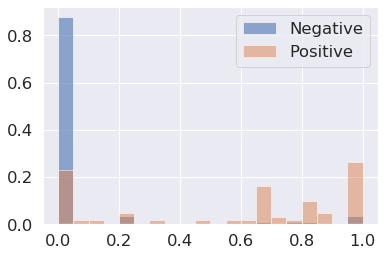

In [89]:
sig_lllist = [i_val[1] for i, i_val in enumerate(y_probas_MLP_noseed_b_prob) if y_train_all.values.ravel()[i]!=0]
bck_lllist = [i_val[1] for i, i_val in enumerate(y_probas_MLP_noseed_b_prob) if y_train_all.values.ravel()[i]!=1]
#getPredDist(sig_lllist, bck_lllist)

w1 = np.ones_like(bck_lllist)/(len(bck_lllist))
w2 = np.ones_like(sig_lllist)/(len(sig_lllist))
    
#plt.title(variable)
plt.hist(bck_lllist, alpha=0.6, label='Negative', bins = 20, range=[mini, maxi], weights=w1)
plt.hist(sig_lllist, alpha=0.5, label='Positive', bins = 20, range=[mini, maxi], weights=w2)
plt.legend()
#plt.savefig('Figs/{}.png'.format(variable.replace(' ', '_').replace('/','')))
plt.show()

In [90]:
conf = confusion_matrix(y_train_all, y_probas_MLP_noseed_b)
print('\\begin{tabular}{l|l|c|c|c}')
print('\\cline{3-4}')
print('\\multicolumn{2}{c|}{}& Predicted 0 & Predicted 1 &\\multicolumn{1}{c}{Total}\\\\')
print('\\cline{2-4}')
print('& Actual 0 & $TN = '+str(conf[0][0])+'$ & $FP = '+str(conf[0][1])+'$ & $'+str(conf[0][0]+conf[0][1])+'$\\\\')
print('\\cline{2-4}')
print('& Actual 1 & $FN = '+str(conf[1][0])+'$ & $TP = '+str(conf[1][1])+'$ & $'+str(conf[1][0]+conf[1][1])+'$\\\\')
print('\\cline{2-4}')
print('\\multicolumn{1}{c}{} & \\multicolumn{1}{c}{Total} & \\multicolumn{1}{c}{$'+str(conf[1][0]+conf[0][0])+'$} & \\multicolumn{    1}{c}{$'+str(conf[0][1]+conf[1][1])+'$} & \\multicolumn{1}{c}{$'+str(conf[0][1]+conf[1][1]+conf[0][0]+conf[1][0])+'$}\\\\')
print('\\end{tabular}')

\begin{tabular}{l|l|c|c|c}
\cline{3-4}
\multicolumn{2}{c|}{}& Predicted 0 & Predicted 1 &\multicolumn{1}{c}{Total}\\
\cline{2-4}
& Actual 0 & $TN = 315$ & $FP = 44$ & $359$\\
\cline{2-4}
& Actual 1 & $FN = 12$ & $TP = 49$ & $61$\\
\cline{2-4}
\multicolumn{1}{c}{} & \multicolumn{1}{c}{Total} & \multicolumn{1}{c}{$327$} & \multicolumn{    1}{c}{$93$} & \multicolumn{1}{c}{$420$}\\
\end{tabular}


In [91]:
var_list = []
y_scores_MLP_list = []
roc_values = []

for i_var, variable in enumerate(all_variables):
    this_vars = all_variables[:i_var]+all_variables[i_var+1:]
    var_list.append(this_vars)
    this_score = cross_val_predict(MLP_clf_noseed, X_train_all[this_vars].values, y_train_all.values.ravel(), cv=2)
    precisions, recallsles, thresholds = precision_recall_curve(y_train_all, this_score)
    print(recallsles[1])
    y_scores_MLP_list.append(recallsles[1])

0.4426229508196721
0.5901639344262295
0.4262295081967213
0.5081967213114754
0.6229508196721312
0.3114754098360656
0.36065573770491804
0.39344262295081966
0.4426229508196721
0.5409836065573771


                        recall
Basophils             0.311475
Eosinophils           0.360656
CRP                   0.393443
Platelets             0.426230
Patient age quantile  0.442623
Hematocrit            0.442623
Leukocytes            0.508197
Neutrophils           0.540984
Hemoglobin            0.590164
Monocytes             0.622951


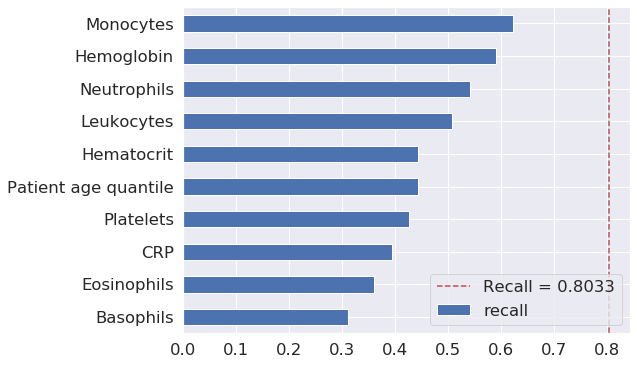

In [92]:
rank_features = {}
for i_var, variable in enumerate(all_variables):
    rank_features[variable] = 0

times=1
for seed in range(times):
    for i_var, variable in enumerate(all_variables):
        rank_features[variable] = rank_features[variable]+(y_scores_MLP_list[i_var])/times

rank_features = pd.DataFrame(data=rank_features.values(), index=rank_features.keys(), columns=['recall'])
rank_features = rank_features.sort_values(by='recall')

print(rank_features)

plt.figure(figsize=(8, 6))
rank_features['recall'].plot(kind = "barh")
plt.vlines(recalls[1],-10,20, colors='r', linestyles='--', label='Recall = {0:.4f}'.format(recalls[1]))
#plt.xlim(0.5,0.6)
plt.legend()
plt.savefig('features_noseed.png',  bbox_inches='tight')

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1]
Confusion Matrix:
[[TN  FP]
 [FN  TP]] = 
[[133  26]
 [  8  14]]

Precision: TP/(TP+FP) =  0.35
Recall: TP/(TP+FN) =  0.6363636363636364
F1 score =  0.45161290322580644


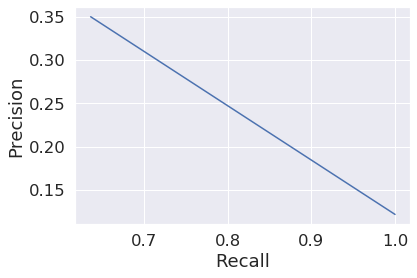

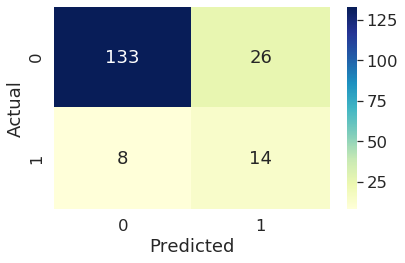

In [98]:

y_pred_prob = MLP_clf_noseed.predict_proba(X_test_all)
y_pred = (y_pred_prob [:,1] >= threshold).astype('int')
print(y_pred)
accuracy_score(y_test_all, y_pred)

conf = confusion_matrix(y_test_all, y_pred)
print("Confusion Matrix:")
print("[[TN  FP]")
print(" [FN  TP]] = ")
print(conf)
print()
print("Precision: TP/(TP+FP) = ", precision_score(y_test_all, y_pred))
print("Recall: TP/(TP+FN) = ", recall_score(y_test_all, y_pred))
print("F1 score = ", f1_score(y_test_all, y_pred))

precisions, recalls, thresholds = precision_recall_curve(y_test_all, y_pred)
plt.plot(recalls[:-1], precisions[:-1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

ax= plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, cmap="YlGnBu", fmt='d');
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.xaxis.set_ticklabels([0, 1]);
ax.yaxis.set_ticklabels([0, 1]);
plt.tight_layout()
plt.savefig('conf_matix.png')

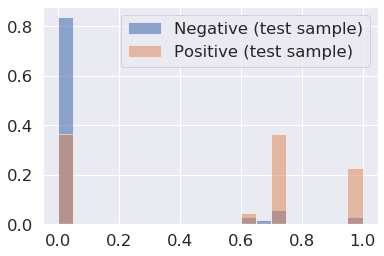

In [94]:
sig_lllist = [i_val[1] for i, i_val in enumerate(y_pred_prob) if y_test_all.values.ravel()[i]!=0]
bck_lllist = [i_val[1] for i, i_val in enumerate(y_pred_prob) if y_test_all.values.ravel()[i]!=1]
#getPredDist(sig_lllist, bck_lllist)

w3 = np.ones_like(bck_lllist)/(len(bck_lllist))
w4 = np.ones_like(sig_lllist)/(len(sig_lllist))
    
#plt.title(variable)
plt.hist(bck_lllist, alpha=0.6, label='Negative (test sample)', bins = 20, range=[mini, maxi], weights=w3)
plt.hist(sig_lllist, alpha=0.5, label='Positive (test sample)', bins = 20, range=[mini, maxi], weights=w4)
plt.legend()
#plt.savefig('Figs/{}.png'.format(variable.replace(' ', '_').replace('/','')))
plt.show()

In [95]:
# #best_f1 = ['Hemoglobin', 'Platelets', 'Leukocytes', 'CRP', 'Basophils', 'Lymphocytes', 'Monocytes', 'Neutrophils']
# best_f1 = ['Basophils', 'Lymphocytes', 'Leukocytes', 'Platelets']

# list1 = ["Patient age quantile", 
#                   "Hemoglobin",
#                   "Platelets", 
#                   "Red blood Cells",
#                   "MCHC",
#                   "MCH",
#                   "RDW",
#                   "MCV",
#                   "Lymphocytes",
#                   "Leukocytes",
#                   "Monocytes",
#                   "Basophils",
#                   "Eosinophils",
#                   "CRP",
#                   "Hematocrit",
#                   "Mean platelet volume ",
#                   "Neutrophils"
#                 ]


# # a = []
# # for i_n, i in enumerate(best_f1):
# #     for j_n, j in enumerate(best_f1[i_n:]):
# #         for k_n, k in enumerate(best_f1[j_n:]):
# #             for l in list1[k_n:]:
# #                 if i!=j and i!=k and i!=l and j!=k and j!=l and k!=l:
# #                     a.append([i, j, k, l])
# #                     print([i, j, k, l])

# # print(len(a))                    

# a = []
# for i_n, i in enumerate(list1):
#     if i not in best_f1:
#         b = best_f1.copy()
#         b.append(i)
#         a.append(b)
#         print(b)
# print()

# big_funs = []
# for varsvisks in a:
#     y_jurema = cross_val_predict(MLP_clf_noseed, X_train_all[varsvisks].values, y_train_all.values.ravel(), cv=2)
#     f1 = f1_score(y_train_all, y_jurema)
#     if f1>0.4:
#         rec = recall_score(y_train_all, y_jurema)
#         if rec>0.4:
#             print(varsvisks)
#     #         conf = confusion_matrix(y_test_all, y_pred)
#     #         print("Confusion Matrix:")
#     #         print("[[TN  FP]")
#     #         print(" [FN  TP]] = ")
#     #         print(conf)
#     #         print()
#             print("Precision: TP/(TP+FP) = ", precision_score(y_train_all, y_jurema))
#             print("Recall: TP/(TP+FN) = ", rec)
#             print("F1 score = ", f1)
#             print()
#             big_funs.append(varsvisks)

# 1º test

['Hemoglobin', 'Platelets', 'Leukocytes']
F1 score =  0.43181818181818177

['Hemoglobin', 'Leukocytes', 'CRP']
F1 score =  0.45360824742268036

['Lymphocytes', 'Basophils', 'Leukocytes']
F1 score =  0.4719101123595506

['Leukocytes', 'Hematocrit', 'Basophils']
F1 score =  0.4827586206896552

['Basophils', 'CRP', 'Leukocytes']
F1 score =  0.441860465116279

# 2º test

['Basophils', 'Lymphocytes', 'Leukocytes', 'Platelets']
Precision: TP/(TP+FP) =  0.42857142857142855
Recall: TP/(TP+FN) =  0.6122448979591837
F1 score =  0.5042016806722688

# 3º test

['Basophils', 'Lymphocytes', 'Leukocytes', 'Platelets', 'Red blood Cells']
Precision: TP/(TP+FP) =  0.4
Recall: TP/(TP+FN) =  0.6122448979591837
F1 score =  0.48387096774193544

['Basophils', 'Lymphocytes', 'Leukocytes', 'Platelets', 'Eosinophils']
Precision: TP/(TP+FP) =  0.4166666666666667
Recall: TP/(TP+FN) =  0.5102040816326531
F1 score =  0.45871559633027525

['Basophils', 'Lymphocytes', 'Leukocytes', 'Platelets', 'Red blood Cells', 'Monocytes']
Precision: TP/(TP+FP) =  0.46774193548387094
Recall: TP/(TP+FN) =  0.5918367346938775
F1 score =  0.5225225225225224

# 4º test

['Basophils', 'Lymphocytes', 'Leukocytes', 'Platelets', 'Red blood Cells', 'Monocytes', 'Hematocrit', 'Eosinophils', 'Mean platelet volume ']
Precision: TP/(TP+FP) =  0.47368421052631576
Recall: TP/(TP+FN) =  0.5510204081632653
F1 score =  0.5094339622641509

In [100]:
my_data = [(23.0-49.0)/15.7, (13.4-13.7)/2.0, (241.0-211.6)/87.4, (4900.0-7048.1)/3350.8, (420.0-570.4)/314.7, (10.0-23.9)/23.5, (250.0-115.5)/179.7, 0, 0, 0]
my_data = np.array(my_data).reshape(1, -1)

y_pred_prob_my = MLP_clf_noseed.predict_proba(my_data)
y_pred_prob_my = (y_pred_prob_my [:,1] >= threshold).astype('int')
print(y_pred_prob_my)

[0]
